# Interpretabilidad

In [17]:
# Imports necesarios
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

from sklearn.model_selection import train_test_split

import random
random.seed(6)

# Cargar el modelo de Random Forest Classifier
with open('rf_clf.pkl', 'rb') as file:
    rf_clf = pickle.load(file)

# Cargar el modelo de MLP Classifier
with open('mlp_clf.pkl', 'rb') as file:
    mlp_clf = pickle.load(file)

nombre_archivo = "../../../GermanRisk/german_credit_data_prepared.csv"
datos_con_gen = pd.read_csv(nombre_archivo)
datos_leidos = datos_con_gen.copy()
datos_leidos = datos_leidos.drop('Sex_male', axis=1)
X = datos_leidos.drop('Risk_True', axis=1)  # Características
y = datos_leidos['Risk_True']  # Etiquetas

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## SHAP

In [11]:
import shap

In [12]:
shap.initjs()

### Random Forest

In [13]:
clf=rf_clf
clf

RandomForestClassifier(max_depth=11, min_samples_leaf=4, min_samples_split=10)

In [47]:
import shap
import pickle
import numpy as np

# Sample 1000 background data samples
background_samples = shap.sample(X_test, 50)

# Guardar los datos de fondo
np.save('SHAP_rf/background_samples_2.npy', background_samples)

# Create the explainer
explainer = shap.KernelExplainer(clf.predict_proba, background_samples)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Guardar el explainer y los SHAP values
with open('SHAP_rf/explainer_2.pkl', 'wb') as f:
    pickle.dump(explainer, f)

np.save('SHAP_rf/shap_values_2.npy', shap_values)

  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [04:17<00:00,  1.29s/it]


In [18]:
import pickle
import numpy as np

# Cargar los datos de fondo
background_samples = np.load('SHAP_rf/background_samples_2.npy')

# Cargar el explainer
with open('SHAP_rf/explainer_2.pkl', 'rb') as f:
    explainer = pickle.load(f)

# Cargar los SHAP values
shap_values = np.load('SHAP_rf/shap_values_2.npy')
# Cargar X_test
X_test = np.load('X_test.npy')


In [19]:
shap.initjs()

In [20]:
X_test_df = pd.DataFrame(X_test, columns=X.columns)
for indice, fila in X_test_df.iterrows():
    # Resto del código aquí

SyntaxError: unexpected EOF while parsing (1420090639.py, line 3)

In [23]:
import pandas as pd

# Crear una lista para almacenar los valores de 'Sex_male'
sex_male_values = []

# Iterar sobre las filas de X_test
X_test_df = pd.DataFrame(X_test, columns=X.columns)
for indice, fila in X_test_df.iterrows():
    # Obtener el índice de la fila actual
    #indice = fila.name  # Puedes usar fila.name o indice directamente
    
    # Obtener el valor correspondiente de 'Sex_male' del DataFrame 'datos_con_gen'
    sex_male_value = datos_con_gen.loc[indice, 'Sex_male']
    
    # Agregar el valor a la lista
    sex_male_values.append(sex_male_value)

# Crear el DataFrame 'mascara_sexo'
mascara_genero = pd.DataFrame({'Sex_male': sex_male_values}, index=np.arange(len(X_test)))

# Imprimir el DataFrame 'mascara_sexo'
print(mascara_genero)


     Sex_male
0           1
1           0
2           1
3           1
4           1
..        ...
195         0
196         0
197         0
198         1
199         1

[200 rows x 1 columns]


In [24]:
shap_values

array([[[-0.054383  ,  0.0342714 , -0.01002961, ...,  0.0586902 ,
          0.        ,  0.        ],
        [ 0.02372578,  0.01562565, -0.0240477 , ..., -0.0125548 ,
          0.        ,  0.        ],
        [-0.01281947,  0.02237064, -0.03516955, ..., -0.0170405 ,
          0.        ,  0.        ],
        ...,
        [-0.1075109 , -0.02594648, -0.03959756, ..., -0.00487053,
          0.        ,  0.        ],
        [-0.10915415,  0.05796804, -0.06309801, ..., -0.00784544,
          0.        ,  0.        ],
        [ 0.05544656, -0.06591799, -0.09354762, ..., -0.0132747 ,
          0.        ,  0.        ]],

       [[ 0.054383  , -0.0342714 ,  0.01002961, ..., -0.0586902 ,
          0.        ,  0.        ],
        [-0.02372578, -0.01562565,  0.0240477 , ...,  0.0125548 ,
          0.        ,  0.        ],
        [ 0.01281947, -0.02237064,  0.03516955, ...,  0.0170405 ,
          0.        ,  0.        ],
        ...,
        [ 0.1075109 ,  0.02594648,  0.03959756, ...,  

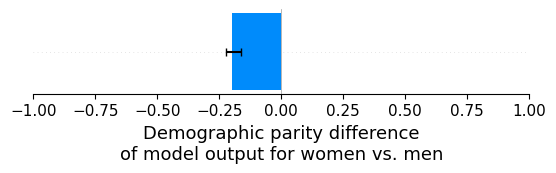

In [25]:
# Aplanar mascara_genero
mascara_genero_flat = mascara_genero['Sex_male'].values.ravel()

# Crear el gráfico de diferencia de grupo SHAP
shap.group_difference_plot(
    shap_values[1].sum(1), mascara_genero_flat, xmin=-1, xmax=1, xlabel='Demographic parity difference\nof model output for women vs. men'
)

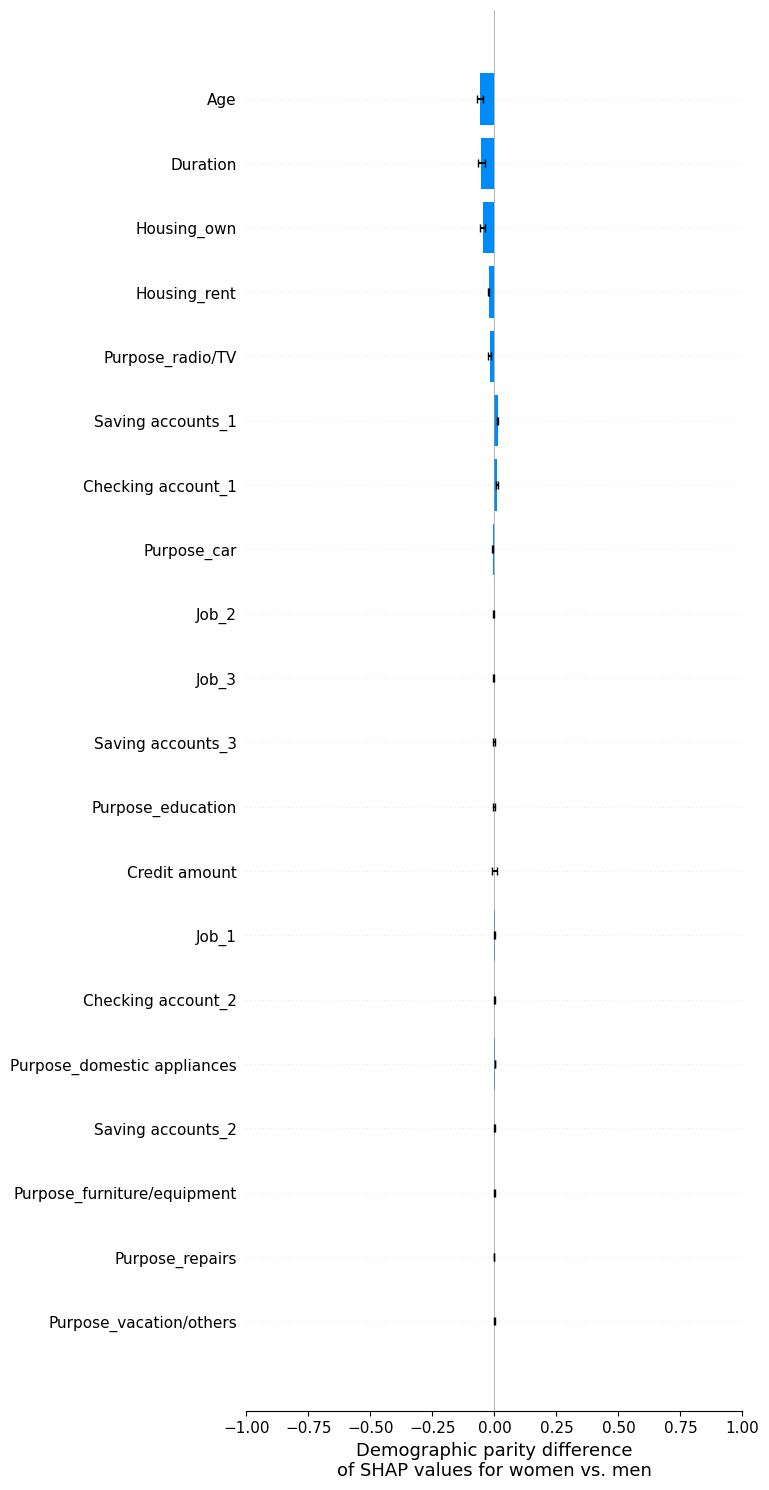

In [27]:
shap.group_difference_plot(
    shap_values[1], mascara_genero_flat, X.columns, xmin=-1, xmax=1, xlabel='Demographic parity difference\nof SHAP values for women vs. men'
)

### Red Neuronal

In [57]:
clf=mlp_clf
clf

MLPClassifier(hidden_layer_sizes=(9, 9), max_iter=1000, random_state=42)

In [58]:
import shap
import pickle
import numpy as np

# Sample 1000 background data samples
background_samples = shap.sample(X_test, 50)

# Guardar los datos de fondo
np.save('SHAP_mlp/background_samples_2.npy', background_samples)

# Create the explainer
explainer = shap.KernelExplainer(clf.predict_proba, background_samples)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Guardar el explainer y los SHAP values
with open('SHAP_mlp/explainer_2.pkl', 'wb') as f:
    pickle.dump(explainer, f)

np.save('SHAP_mlp/shap_values_2.npy', shap_values)

100%|██████████| 200/200 [02:20<00:00,  1.42it/s]


In [ ]:
import pickle
import numpy as np

# Cargar los datos de fondo
background_samples = np.load('SHAP_mlp/background_samples_2.npy')

# Cargar el explainer
with open('SHAP_mlp/explainer_2.pkl', 'rb') as f:
    explainer = pickle.load(f)

# Cargar los SHAP values
shap_values = np.load('SHAP_mlp/shap_values_2.npy')
# Cargar X_test
X_test = np.load('X_test.npy')


In [59]:
shap.initjs()

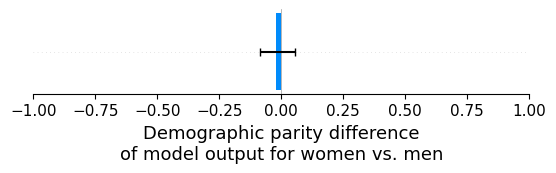

In [60]:
# Crear el gráfico de diferencia de grupo SHAP
shap.group_difference_plot(
    shap_values[1].sum(1), mascara_genero_flat, xmin=-1, xmax=1, xlabel='Demographic parity difference\nof model output for women vs. men'
)

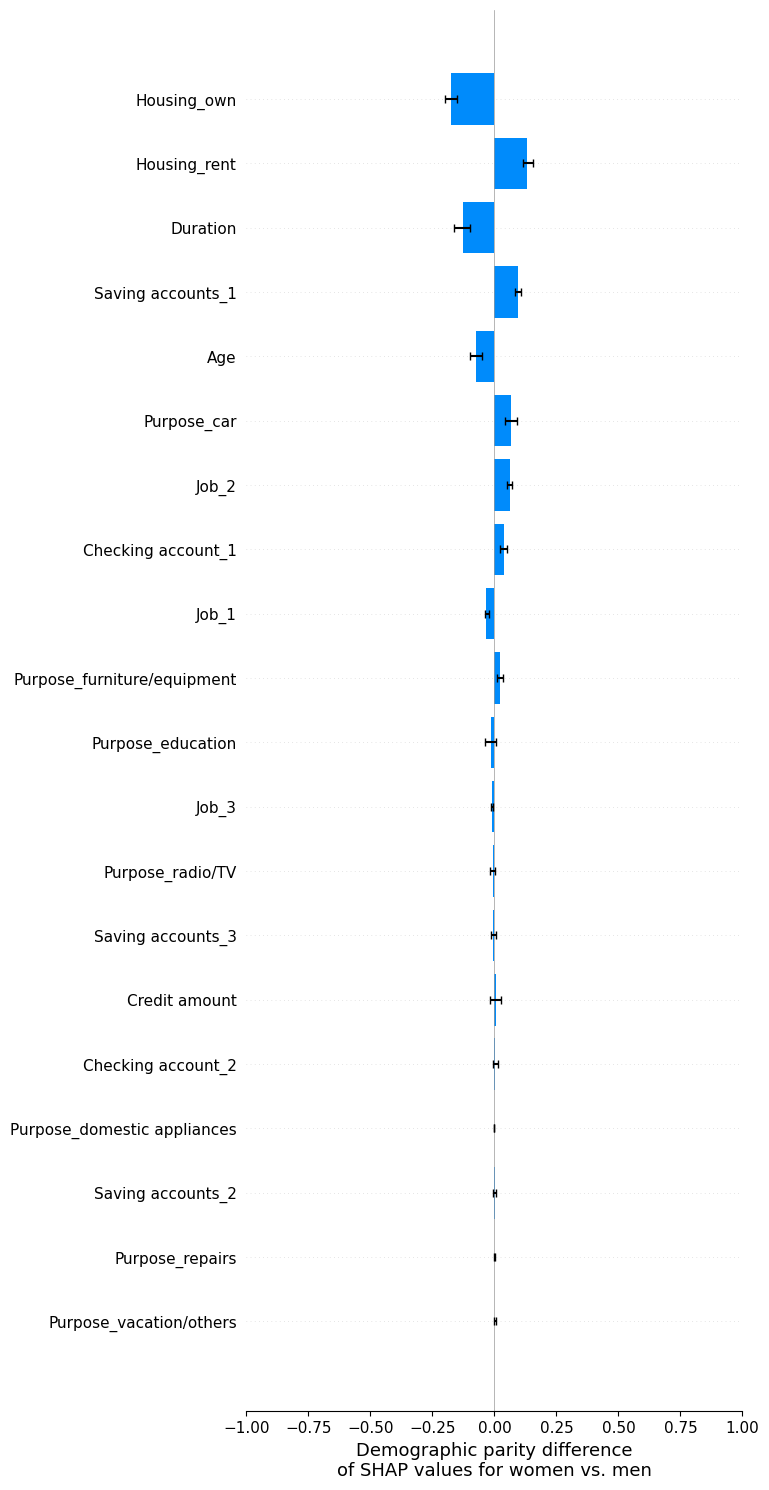

In [61]:
# Crear el gráfico de diferencia de grupo SHAP
shap.group_difference_plot(
    shap_values[1], mascara_genero_flat, X_test.columns, xmin=-1, xmax=1, xlabel='Demographic parity difference\nof SHAP values for women vs. men'
)
